In [15]:
!apt-get install -y fonts-nanum  # 나눔 폰트를 설치
!fc-cache -fv  # 폰트 캐시를 갱신
!rm ~/.cache/matplotlib -rf  # matplotlib의 캐시를 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)

births_data : 모델로 부터 추출한 신생아 수 예측 데이터 \\
mortality_data : 사망률 데이터 \\
total_population_data : 22년도 총인구 데이터


In [5]:
total_population_data = pd.read_csv('/content/drive/MyDrive/KUBIG/K-DS hackathon/K-DS_hackathon_data/가공데이터/human_2022.csv',  index_col = 'Unnamed: 0')

In [6]:
total_population_data

,2022
0세,249089.5
1세,269686.5
2세,291777.0
3세,319980.5
4세,348195.5
5세,388283.0
6세,428629.0
7세,442536.5
8세,440966.0
9세,465442.5


In [7]:
mortality_data = pd.read_csv('/content/drive/MyDrive/KUBIG/K-DS hackathon/K-DS_hackathon_data/가공데이터/연령별 사망률 추계.csv', index_col = '시점')

In [8]:
mortality_data

,0세 평균,1세 평균,2세 평균,3세 평균,4세 평균,5세 평균,6세 평균,7세 평균,8세 평균,9세 평균,10세 평균,11세 평균,12세 평균,13세 평균,14세 평균,15세 평균,16세 평균,17세 평균,18세 평균,19세 평균,20세 평균,21세 평균
시점,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.002135,0.000135,0.000110,0.000090,0.000075,0.000065,0.000060,0.000065,0.000055,0.000050,0.000055,0.000065,0.000080,0.000105,0.000130,0.000150,0.000175,0.000205,0.000235,0.000260,0.000290,0.000320
2023-01-01,0.002035,0.000130,0.000110,0.000090,0.000075,0.000060,0.000060,0.000055,0.000055,0.000050,0.000050,0.000055,0.000075,0.000100,0.000120,0.000145,0.000170,0.000195,0.000220,0.000250,0.000280,0.000305
2024-01-01,0.001925,0.000120,0.000100,0.000080,0.000065,0.000060,0.000055,0.000055,0.000055,0.000050,0.000045,0.000055,0.000075,0.000095,0.000115,0.000140,0.000160,0.000185,0.000215,0.000235,0.000265,0.000295
2025-01-01,0.001835,0.000110,0.000095,0.000080,0.000065,0.000055,0.000050,0.000055,0.000050,0.000040,0.000045,0.000055,0.000070,0.000090,0.000110,0.000135,0.000160,0.000180,0.000205,0.000230,0.000255,0.000280
2026-01-01,0.001745,0.000110,0.000095,0.000075,0.000065,0.000055,0.000050,0.000045,0.000045,0.000040,0.000040,0.000050,0.000065,0.000085,0.000105,0.000125,0.000150,0.000170,0.000195,0.000220,0.000245,0.000270
2027-01-01,0.001655,0.000100,0.000085,0.000070,0.000055,0.000050,0.000050,0.000045,0.000045,0.000040,0.000040,0.000045,0.000065,0.000080,0.000100,0.000120,0.000145,0.000165,0.000185,0.000210,0.000230,0.000260
2028-01-01,0.001590,0.000100,0.000085,0.000065,0.000055,0.000045,0.000045,0.000045,0.000045,0.000040,0.000040,0.000045,0.000060,0.000080,0.000095,0.000115,0.000135,0.000160,0.000180,0.000205,0.000225,0.000250
2029-01-01,0.001515,0.000090,0.000080,0.000065,0.000050,0.000045,0.000040,0.000045,0.000040,0.000040,0.000035,0.000045,0.000055,0.000075,0.000095,0.000110,0.000135,0.000155,0.000175,0.000195,0.000215,0.000240
2030-01-01,0.001455,0.000090,0.000075,0.000065,0.000050,0.000045,0.000040,0.000040,0.000040,0.000030,0.000035,0.000040,0.000055,0.000070,0.000085,0.000105,0.000125,0.000145,0.000165,0.000185,0.000210,0.000235


In [9]:
births_data = pd.read_csv('/content/drive/MyDrive/KUBIG/K-DS hackathon/K-DS_hackathon_data/가공데이터/출생아수_example.csv', index_col = 'Date')

In [24]:
births_data= pd.read_csv('/content/drive/MyDrive/KUBIG/K-DS hackathon/K-DS_hackathon_data/가공데이터/한국출생아_미래_draft.csv', index_col = 'year')

In [25]:
births_data

,birth_population
year,
2022-01-01,249100
2023-01-01,249371
2024-01-01,249177
2025-01-01,249323
2026-01-01,248984
2027-01-01,248660
2028-01-01,248335
2029-01-01,248545
2030-01-01,249067


In [29]:
def predict_population(target_year, age):  # target_year 예시 : 40, 50
    # 시작 연도 계산
    start_year = target_year - age

    # 사망율 데이터가 시작되는 연도
    mortality_data_start_year = 22

    # 시작 연도가 사망율 데이터 시작 연도보다 이전인 경우
    if start_year <= mortality_data_start_year:
        # 2022년의 총 인구 수로 시작
        age3 = str(22 - age) + '세'
        population = total_population_data.loc[age3, '2022'] # 2022년도의 22-age 살 데이터
        # 2022년부터 대상 연도까지 사망율 적용
        for year in range(mortality_data_start_year, target_year):
            # 연도 형식을 'YYYY-MM-DD'로 맞춤
            year2 = str(year + 2000) + '-01-01'
            age2 = str(year - start_year) + '세 평균'
            survival_rate = 1 - mortality_data.loc[year2][age2]   # mortality_data : 사망율 데이터, mortality_data[연도][나이] 꼴임. 연도는 datetime 꼴이고 나이는 'x세 평균' 꼴임으로 바꿔줌.
            population *= survival_rate

    else:
        # 시작 연도의 신생아 수로 시작
        start_year2 = str(start_year + 2000) + '-01-01'
        population = births_data.loc[start_year2, 'birth_population']
        # 시작 연도부터 대상 연도까지 사망율 적용
        for year in range(start_year, target_year):
            # 연도 형식을 'YYYY-MM-DD'로 맞춤
            year2 = str(year + 2000) + '-01-01'
            age2 = str(year - start_year) + '세 평균'
            survival_rate = 1 - mortality_data.loc[year2][age2]
            population *= survival_rate

    # 예상 인구 반환
    return population


In [27]:
predict_population(40, 20)

291393.5489764831

In [30]:
predict_population(60, 20)

247512.948255626

# 그룹별 학령인구 시각화

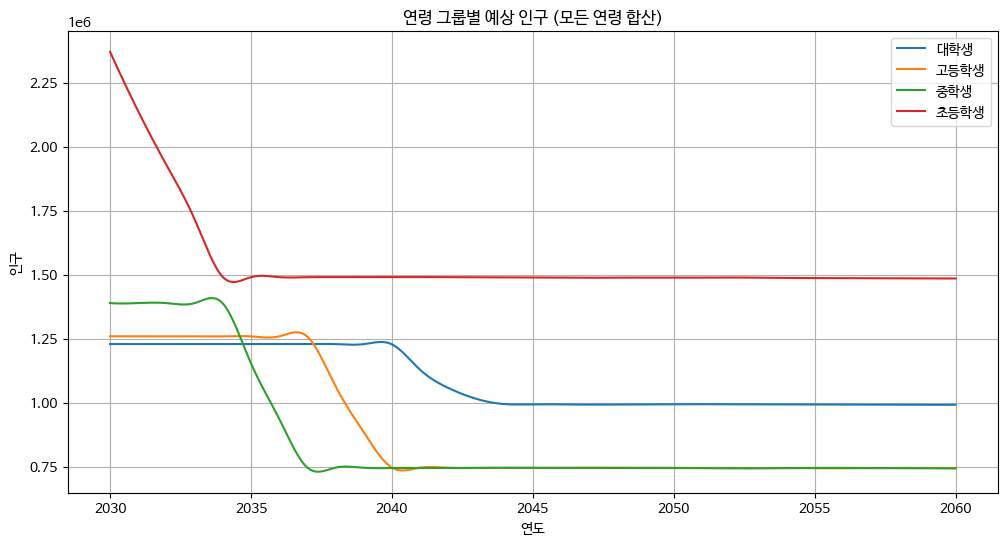

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.font_manager as fm

# Set a font that supports Korean characters
# For example, 'NanumBarunGothic' is a font that supports Korean
# You need to have this font installed on your system
# If it's not installed, you can install it or use another font that supports Korean
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # Change this to the path of your Korean font
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())
# ... [Other code components like predict_population function]

# 예상 인구를 저장할 딕셔너리
population_data = {
    '대학생': [],
    '고등학생': [],
    '중학생': [],
    '초등학생': []
}

# 대상 연령 그룹 정의
age_groups = {
    '대학생': (18, 21),
    '고등학생': (15, 17),
    '중학생': (12, 14),
    '초등학생': (6, 11)
}

# 대상 연도 범위
start_year = 30
end_year = 60

# 대상 연령 그룹과 연도에 따라 인구 예측
for year in range(start_year, end_year + 1):
    for group, age_range in age_groups.items():
        min_age, max_age = age_range
        # 대상 연령 그룹의 모든 연령에 대한 예상 인구 합산
        total_population = 0
        for age in range(min_age, max_age + 1):
            population = predict_population(year, age)
            total_population += population
            # print(f"Year: {year}, Age: {age}, Predicted Population: {population}")  # Verifying population values
        # 결과를 딕셔너리에 저장
        population_data[group].append(total_population)

# 결과를 데이터프레임으로 변환
df_population = pd.DataFrame(population_data, index=range(start_year + 2000, end_year + 2001))  # Adjust index to actual years

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 각 그룹별로 부드러운 곡선 그리기
for group in df_population.columns:
    # Interpolation for smoothing
    x = df_population.index
    y = df_population[group]
    f = interp1d(x, y, kind='cubic')  # 'cubic' spline for smooth curve
    x_new = np.linspace(min(x), max(x), 500)  # Generate new x values for a smooth curve
    y_smooth = f(x_new)

    plt.plot(x_new, y_smooth, label=group)

# 그래프 스타일 및 레이블 설정
plt.title('연령 그룹별 예상 인구 (모든 연령 합산)', fontproperties=font_prop)
plt.xlabel('연도')
plt.ylabel('인구')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

#